In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('/home/sam/Desktop/MachienLearning/MachineLearning22/datasets/new/archive/heart.csv')
saturation = pd.read_csv('/home/sam/Desktop/MachienLearning/MachineLearning22/datasets/new/archive/o2Saturation.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


/home/sam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sam/.local/li

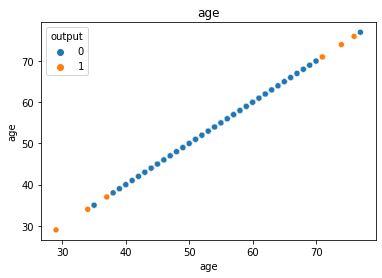

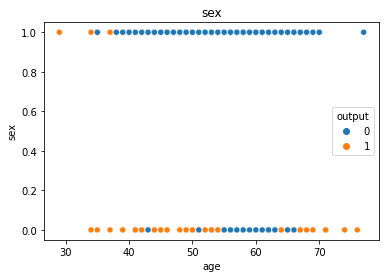

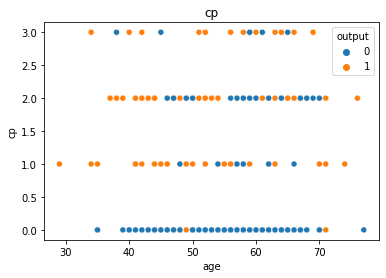

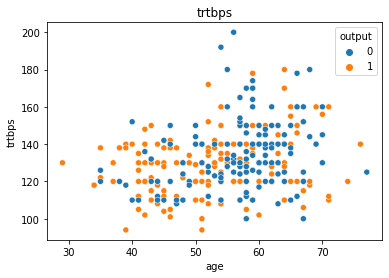

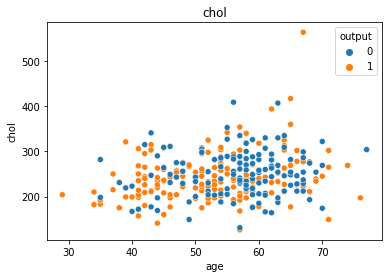

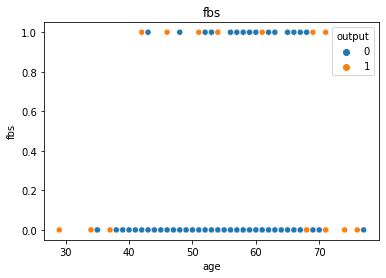

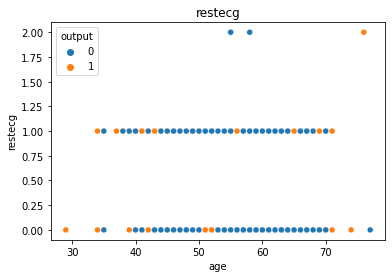

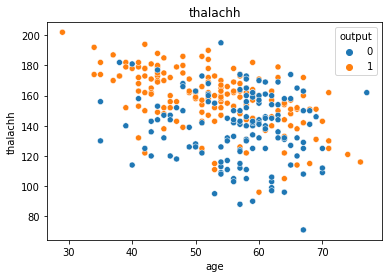

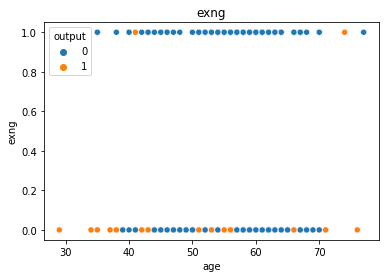

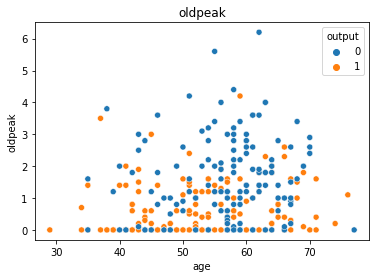

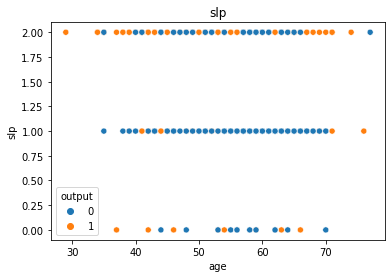

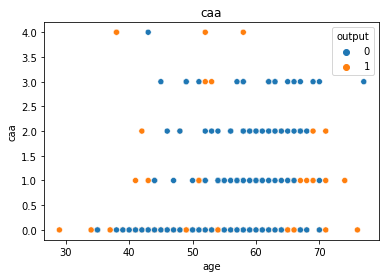

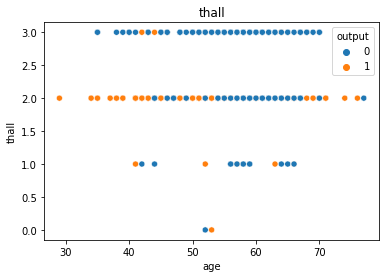

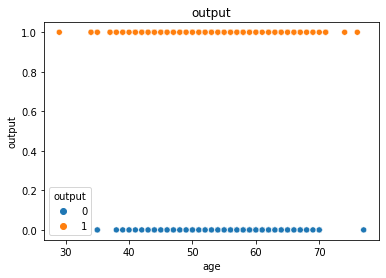

In [34]:
for col in df.columns:
    plt.figure()
    plt.title(col)
    sns.scatterplot(df['age'], df[col], hue=df['output'])

/home/sam/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

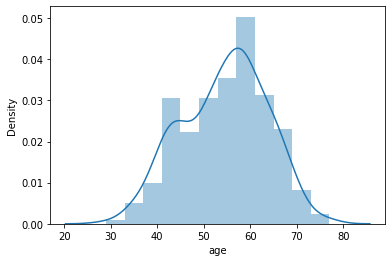

In [35]:
sns.distplot(df['age'])

/home/sam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cp', ylabel='count'>

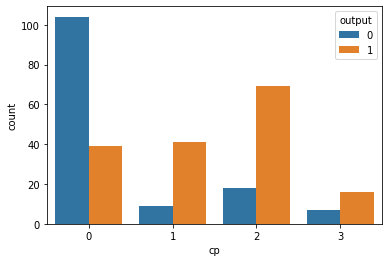

In [37]:
sns.countplot(df['cp'], hue=df['output'])

/home/sam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trtbps'>

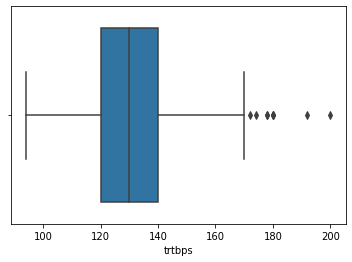

In [38]:
sns.boxplot(df['trtbps'])

/home/sam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='chol'>

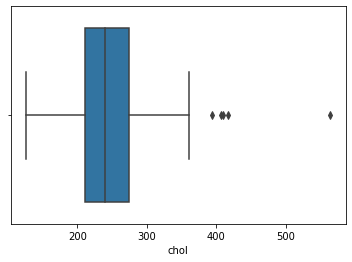

In [39]:
sns.boxplot(df['chol'])

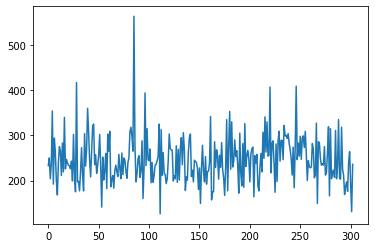

In [42]:
plt.plot(df['chol'])

## lets train model

In [57]:
# preprocessing imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA

#impoting matrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#importin pipelines
from sklearn.pipeline import Pipeline

In [76]:
# create pipelines
pl_regression = Pipeline(steps = [('Std', StandardScaler()), ('sr', LogisticRegression())])
pl_deci = Pipeline(steps = [('Std', StandardScaler()), ('sr', DecisionTreeClassifier())])
pl_random = Pipeline(steps = [('Std', StandardScaler()), ('sr', RandomForestClassifier())])
pl_ada = Pipeline(steps = [('Std', StandardScaler()), ('sr', AdaBoostClassifier())])
pl_grad = Pipeline(steps = [('Std', StandardScaler()),
                                  ('sr', GradientBoostingClassifier(learning_rate = 0.01, n_estimators=500),)])
pl_gnb = Pipeline(steps = [('Std', StandardScaler()), ('sr', GaussianNB())])
pl_svc = Pipeline(steps = [('Std', StandardScaler()), ('sr', SVC())])

In [77]:
models = [pl_regression, pl_deci, pl_random, pl_ada, pl_grad, pl_gnb, pl_svc]

In [78]:
x = df.drop('output', axis=1)
y = df['output']

In [79]:
# train and test data
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.4, random_state= 42)

In [80]:
# model training
for model in models:
    pred = model.fit(train_x, train_y)
    score = model.score(test_x, test_y)
    print(f'{model} : {score}')

Pipeline(steps=[('Std', StandardScaler()), ('sr', LogisticRegression())]) : 0.8442622950819673
Pipeline(steps=[('Std', StandardScaler()), ('sr', DecisionTreeClassifier())]) : 0.7704918032786885
Pipeline(steps=[('Std', StandardScaler()), ('sr', RandomForestClassifier())]) : 0.8278688524590164
Pipeline(steps=[('Std', StandardScaler()), ('sr', AdaBoostClassifier())]) : 0.819672131147541
Pipeline(steps=[('Std', StandardScaler()),
                ('sr',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            n_estimators=500))]) : 0.819672131147541
Pipeline(steps=[('Std', StandardScaler()), ('sr', GaussianNB())]) : 0.8360655737704918
Pipeline(steps=[('Std', StandardScaler()), ('sr', SVC())]) : 0.8524590163934426
